In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import sklearn

In [3]:
classification_df = pd.read_csv("classification.csv")
regression1_df = pd.read_csv("regression_1.csv")
regression2_df = pd.read_csv("regression_2.csv")


In [4]:
classification_df

ModuleNotFoundError: No module named 'pandas.io.formats.string'

ModuleNotFoundError: No module named 'pandas.io.formats.html'

<Axes: xlabel='x1', ylabel='x2'>

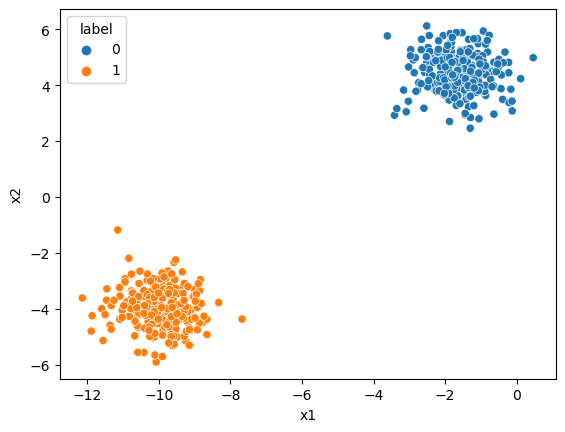

In [21]:
sns.scatterplot(data=classification_df, x='x1', y='x2', hue='label')

In [22]:

regression1_df

,x1,x2
0,0.0,-0.674904
1,0.1,-0.479806
2,0.2,-0.806082
3,0.3,0.053077
4,0.4,-0.393342
...,...,...
58,5.8,-0.930421
59,5.9,-1.674052
60,6.0,-0.473458
61,6.1,-1.529905


In [23]:
regression1_df.describe()

,x1,x2
count,63.00000,63.000000
mean,3.10000,-0.016079
std,1.83303,1.167700
min,0.00000,-2.112807
25%,1.55000,-0.868252
50%,3.10000,-0.043282
75%,4.65000,0.865807
max,6.20000,2.281413


<Axes: xlabel='x1', ylabel='x2'>

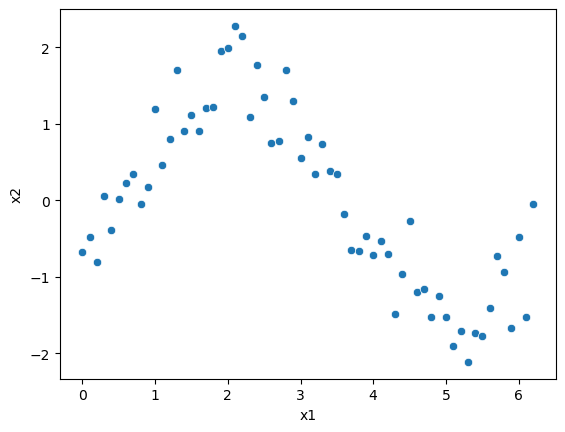

In [24]:
sns.scatterplot(data=regression1_df,x=regression1_df["x1"],y=regression1_df["x2"])

<Axes: xlabel='x1', ylabel='x2'>

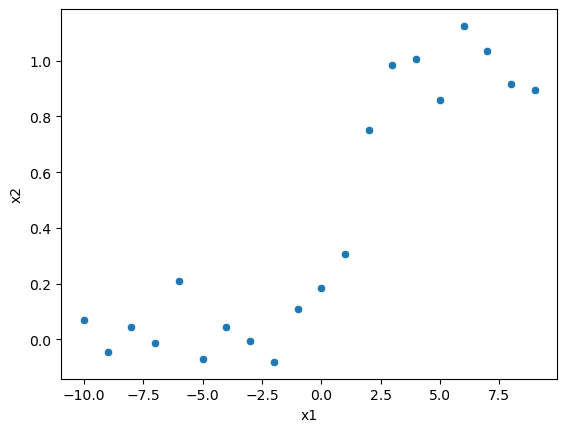

In [25]:
sns.scatterplot(data=regression2_df,x=regression2_df["x1"],y=regression2_df["x2"])